In [0]:
import numpy as np
import random 
import operator
import pandas as pd
import matplotlib.pyplot as plt

City class to handle cities and distance

In [0]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Fitness class

In [0]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

Creating population

In [26]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

cname = ['a','b','c','d','e']
initialPopulation(len(cname),cname)


[['e', 'd', 'c', 'b', 'a'],
 ['a', 'b', 'c', 'e', 'd'],
 ['b', 'e', 'a', 'd', 'c'],
 ['b', 'c', 'd', 'a', 'e'],
 ['a', 'b', 'e', 'c', 'd']]

Determining fitness, ranking from highest fitness to lowest

In [0]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)


Selecting mating pool

In [0]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults
    

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Crossover/Breeding


In [0]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child



def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Mutate

In [0]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual


def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Repeat

In [0]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Start with initial population

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute


cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [27]:
# popSize = 100
# eliteSize = 20
# mutationRate = 0.01
# generations = 500
popSize = int(input("Enter the population size: "))
eliteSize = int(input("Enter the number of top results to be selected: "))
mutationRate = float(input("Enter the mutation rate: "))
generations = int(input("Enter the number of generations: "))
print("\n\n")

geneticAlgorithm(population=cityList, popSize=popSize, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations)

Enter the population size: 100
Enter the number of top results to be selected: 20
Enter the mutation rate: 0.01
Enter the number of generations: 500



Initial distance: 2078.5061533217577
Final distance: 904.467360585828


[(35,37),
 (22,63),
 (97,67),
 (75,79),
 (39,96),
 (53,113),
 (54,123),
 (60,142),
 (11,148),
 (32,188),
 (66,157),
 (91,156),
 (107,123),
 (131,144),
 (155,193),
 (187,166),
 (196,130),
 (185,132),
 (173,144),
 (146,119),
 (149,105),
 (171,37),
 (152,2),
 (113,11),
 (52,21)]

Plot graph

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

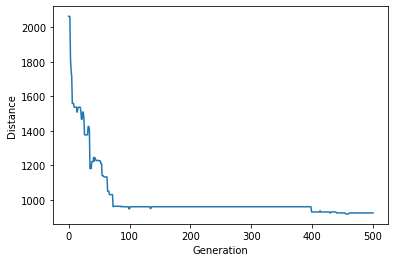

In [29]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500) 

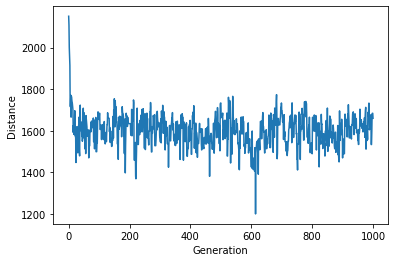

In [20]:
geneticAlgorithmPlot(population=cityList, popSize=200, eliteSize=50, mutationRate=0.05, generations=1000) 

In [21]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500) 

Initial distance: 2052.4993152634224
Final distance: 889.9354404457082


[(155,193),
 (131,144),
 (107,123),
 (91,156),
 (66,157),
 (60,142),
 (32,188),
 (11,148),
 (54,123),
 (53,113),
 (39,96),
 (22,63),
 (35,37),
 (52,21),
 (75,79),
 (97,67),
 (113,11),
 (152,2),
 (171,37),
 (149,105),
 (146,119),
 (173,144),
 (185,132),
 (196,130),
 (187,166)]

Crossover


![alt text](https://miro.medium.com/max/1400/1*YhmzBBCyAG3rtEBbI0gz4w.jpeg)